In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns

# THIS BEGINS THE INTERSECTION OF WF AND NON INF PATIENTS

In [2]:
#Read data

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
non_inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    non_inf_patients.append(data['Peptide'])
    df_ninf = df_ninf.append(data)  # appends all data

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    inf_patients.append(data['Peptide'])
    df_inf = df_inf.append(data)  # appends all data

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


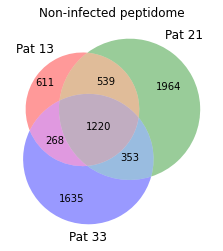

In [3]:
v=venn3([set(non_inf_patients[0]),set(non_inf_patients[1]),set(non_inf_patients[2])], set_labels=('Pat 13','Pat 21','Pat 33'))
plt.title('Non-infected peptidome');


Text(0.5, 1.0, 'Infected peptidome')

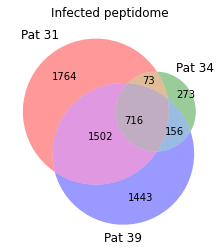

In [4]:
venn3([set(inf_patients[0]),set(inf_patients[1]),set(inf_patients[2])], set_labels=('Pat 31', 'Pat 34','Pat 39'))
plt.title('Infected peptidome')

In [5]:
#Wound fluid
# sorts out if feature<4
df_WF_all=pd.DataFrame()
df_WF_all['Peptide']=df_WF['Peptide']
df_WF = df_WF.loc[(df_WF['#Feature'] >= 4)] 
df_WF = df_WF.groupby(['Accession','Peptide']).sum()
df_WF.reset_index(['Peptide'], inplace=True)
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['count','#Feature'], ascending=False)

#Non-infected patients
df_ninf_all=pd.DataFrame()
df_ninf_all['Peptide']=df_ninf['Peptide']
df_ninf = df_ninf.loc[(df_ninf['#Feature'] >= 4)] # sorts out if feature<4

df_ninf = df_ninf.groupby(['Accession','Peptide']).sum()
df_ninf.reset_index(['Peptide'], inplace=True)
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['count','#Feature'], ascending=False)

#infected patients
df_inf_all=pd.DataFrame()
df_inf_all['Peptide']=df_inf['Peptide']
df_inf = df_inf.loc[(df_inf['#Feature'] >= 4)] # sorts out if feature<4

df_inf = df_inf.groupby(['Accession','Peptide']).sum()
df_inf.reset_index(['Peptide'], inplace=True)
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['count','#Feature'], ascending=False)
df_WF_all

,Peptide
0,AAFNSGKVDIV
1,AAFNSGKVDIVAI
2,AAGSDVDIDMAFILDSAETT
3,AAHLPAEFTPA
4,AAHLPAEFTPAV
...,...
2915,YVDVLKDSGRDYV
2916,YVNKEIQNAV
2917,YVNKEIQNAVNGV
2918,YWKALGISPF


In [6]:
df_ninf_same=df_ninf.loc[(df_ninf['count']==3)]
df_WF_same=df_WF.loc[(df_WF['count']==5)]

df_WF_ninf=df_WF_same.append(df_ninf_same)
df_WF_ninf.reset_index()
df_WF_ninf=df_WF_ninf.groupby(['Accession','Peptide']).sum()
df_WF_ninf.sort_values(['count','#Feature'], ascending=False)
df_ninf_same


,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count
Accession,,,,,,
sp|P02671|FIBA_HUMAN,MELERPGGNEITR,94,18.0,35.0,40.0,3
sp|P02671|FIBA_HUMAN,MELERPGGNEIT,69,18.0,32.0,18.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,46,8.0,12.0,26.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,46,13.0,13.0,20.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,41,11.0,12.0,18.0,3
...,...,...,...,...,...,...
sp|P69905|HBA_HUMAN,SLDKFLASVSTV,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,SLDKFLASVSTVLT,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,SPADKTNVK,12,4.0,4.0,4.0,3


Text(0.5, 1.0, 'WF intersection as part of total WF')

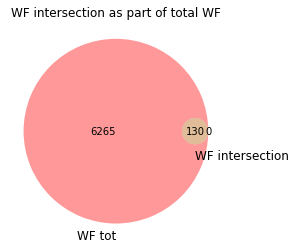

In [7]:
venn2([set(df_WF_all['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('WF tot', 'WF intersection'))
plt.title('WF intersection as part of total WF')

Text(0.5, 1.0, 'WF vs non-infected overlap')

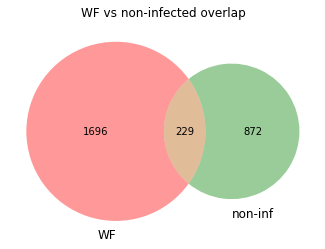

In [8]:
venn2([set(df_WF['Peptide']), set(df_ninf['Peptide'])], set_labels = ('WF', 'non-inf'))
plt.title('WF vs non-infected overlap')

In [38]:
df_inf_same=df_inf.loc[(df_inf['count']==3)]

df_ninf_inf=df_ninf_same.append(df_inf_same)
df_ninf_inf.reset_index()
df_ninf_inf=df_ninf_inf.groupby(['Accession','Peptide']).sum()
df_ninf_inf=df_ninf_inf.sort_values(['count','#Feature'], ascending=False)
df_ninf_inf['Difference (ninf-inf)']=(df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])-(df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])
df_ninf_inf=df_ninf_inf.sort_values(['#Feature'], ascending=False)
df_ninf_inf.reset_index(inplace=True)
df_ninf_inf

,Accession,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,Difference (ninf-inf)
0,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,156,11.0,12.0,18.0,6,40.0,15.0,60.0,-74.0
1,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,155,13.0,13.0,20.0,6,42.0,12.0,55.0,-63.0
2,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,142,8.0,12.0,26.0,6,35.0,9.0,52.0,-50.0
3,sp|P68871|HBB_HUMAN,VHLTPEEKSAV,102,8.0,8.0,8.0,6,28.0,14.0,36.0,-54.0
4,sp|P69905|HBA_HUMAN,STVLTSKYR,102,8.0,7.0,10.0,6,21.0,15.0,41.0,-52.0
...,...,...,...,...,...,...,...,...,...,...,...
213,sp|P02671|FIBA_HUMAN,EEVSGNVSPGTR,12,0.0,0.0,0.0,3,4.0,4.0,4.0,-12.0
214,sp|P02652|APOA2_HUMAN,SPELQAEAK,12,0.0,0.0,0.0,3,4.0,4.0,4.0,-12.0
215,sp|P01024|CO3_HUMAN,IHWESASLL,12,4.0,4.0,4.0,3,0.0,0.0,0.0,12.0
216,sp|P00915|CAH1_HUMAN,HNNRPTQPL,12,4.0,4.0,4.0,3,0.0,0.0,0.0,12.0


,_merge,Peptide
Accession,,
sp|P69905|HBA_HUMAN,left_only,SHGSAQVK
sp|P69905|HBA_HUMAN,left_only,FLSFPTTKT
sp|P69905|HBA_HUMAN,left_only,VLSPADKT
sp|P69905|HBA_HUMAN,left_only,AAHLPAEFTPAVHA
sp|P68871|HBB_HUMAN,left_only,HLDNLKGTFA
sp|P69905|HBA_HUMAN,left_only,HASLDKFLASVST
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,left_only,DGLAHLDNLKGTF
sp|P68871|HBB_HUMAN,left_only,HLTPEEKSAVT
sp|P69905|HBA_HUMAN,left_only,VADALTNAVAH


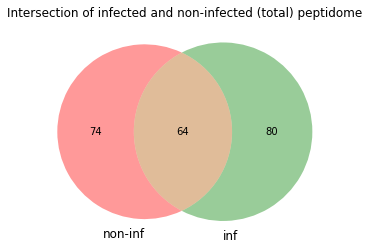

In [57]:
venn2([set(df_ninf_same['Peptide']), set(df_inf_same['Peptide'])], set_labels = ('non-inf', 'inf'))
plt.title('Intersection of infected and non-infected (total) peptidome')
biomarker=df_inf_same.merge(df_ninf_same, on=['Peptide','Accession'], indicator= True, how='outer')
biomarker=biomarker[['_merge','Peptide']].sort_values('_merge')
biomarker=biomarker.loc[(biomarker['_merge']=='left_only')]
biomarker[0:30]


In [ ]:
v=venn3([set(df_ninf_same['Peptide']), set(df_inf_same['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('non-inf', 'inf', 'WF'))
plt.title('Diagram of (intersected) peptidome of WF, infected and non-infected')